# Goover's algorithm to find the minimum

The basic idea is to use the groover's algorithm multiple times changing the orcale function as follows:
![](https://raw.githubusercontent.com/zommiommy/quantum_research/master/Minimum_Spanning_Tree/imgs/schmatics.png?token=AX9E8xNxudIRVGJxQNEhg0k_7tYyVJGqks5cO2X1wA%3D%3D)

# Libraries Imports

In [1]:
import random
import numpy as np
import QuantumSystem as QS
from QuantumSystem import QuantumSystem

In [2]:
random.seed(43)
np.random.seed(43)

In [3]:
q = QuantumSystem(3)

In [4]:
q.disable_printing()

# Definition of the single gover's step

In [5]:
def grovers_step(oracle):
    q.H()
    q.apply_function(oracle,"O_f")
    q.H()
    q.X()
    q.CCZ()
    q.X()
    q.H()
    QS.print_matrix(q.wave_function)
    q.print_wave_function()

# Definition of the grover's algorithm

In [6]:
def grovers_algorithm(oracle):
    number_of_iterations = int((np.pi/4)*(q.n_of_states)**0.5)
    for _ in range(number_of_iterations):
        grovers_step(oracle)

# Creation of a toy example of a set of number

Since we have $Q$ qbits we can rappresent $2^Q$ numbers, N = $[0, 2^Q-1]$ to create a toy dataset we can choose $n$ numbers from this set:

In [7]:
n_of_samples = 3

In [8]:
dataset = np.random.choice(q.n_of_states, n_of_samples, replace=False)
print(dataset)

[3 7 5]


# Creation of the Oracle $O_f$ to filter the data
The oracle can be rappresented as an identity matrix of dimension $(2^Q, 2^Q)$ where the the sign is filpped on the state that we want to keep.

In [9]:
def create_filter_oracle(dataset):
    oracle_1 = np.matrix(np.eye(q.n_of_states))
    for v in dataset:
        oracle_1[v,v] = -1
    return oracle_1

# Creation of the Second oracle $O_{f2}$ to find all the value less than j
This oracle is also an identity matrix where the sign of all the states less or equal than j is flipped

In [10]:
def create_less_oracle(j):
    oracle_2 = np.matrix(np.eye(q.n_of_states))
    for v in dataset:
        if v <= j:
            oracle_2[v,v] = -1
    return oracle_2

# Definition of the Possible algorithm

In [11]:
def find_min_iter(dataset, j):
    QS.mdprint(r"## Filtering the dataset Elements")
    grovers_algorithm(create_filter_oracle(dataset))
    QS.mdprint(r"## Filtering the elements less equal than %d"%j)
    grovers_algorithm(create_less_oracle(j))
    j = q.observe()
    QS.mdprint(r"### The new min is %d"%j)
    return j

In [12]:
def find_min(dataset):
    QS.mdprint(r"## Filtering the dataset Elements")
    grovers_algorithm(create_filter_oracle(dataset))
    j = q.observe()
    QS.mdprint(r"### The first min is %d"%j)
    
    n_of_iterations = int((2**len(dataset))**0.5)
    for i in range(n_of_iterations):
        QS.mdprint(r"# Starting Iteration %d"%i)
        j = find_min_iter(dataset,j)
    return j

# Initialization of the system

<IPython.core.display.Latex object>

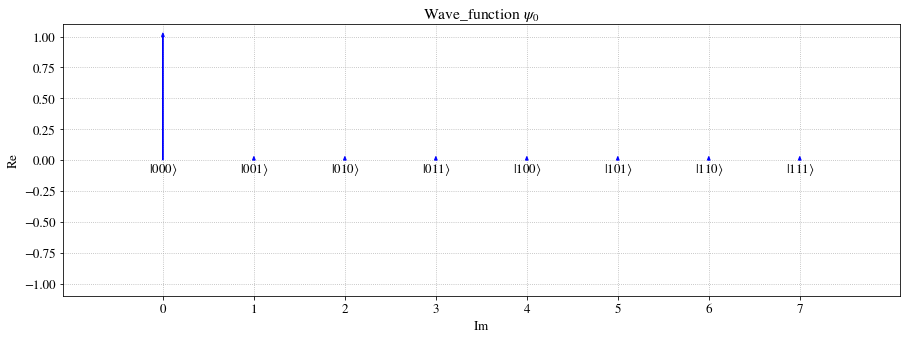

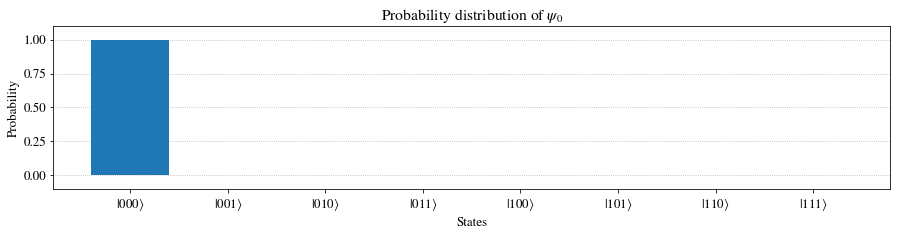

In [13]:
q.initialize_wave_function()

# Test of the minimum find algorithm

## Filtering the dataset Elements

<IPython.core.display.Latex object>

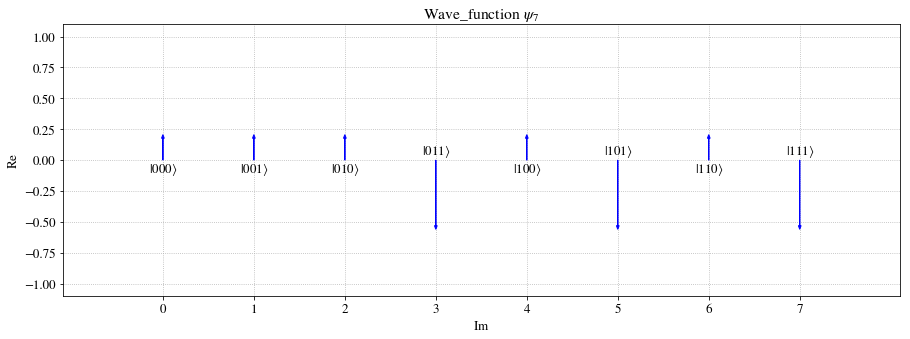

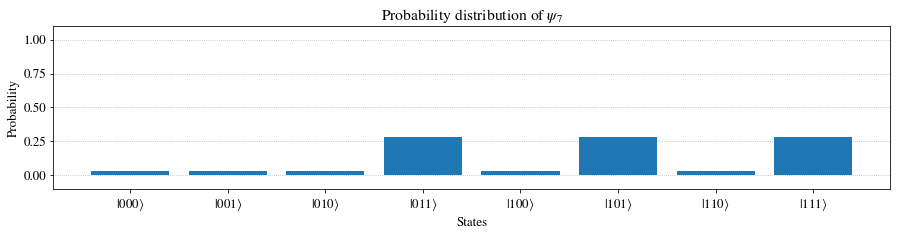

<IPython.core.display.Latex object>

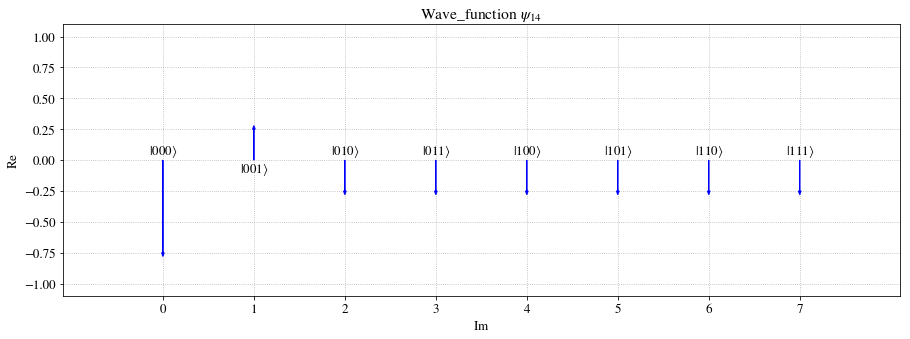

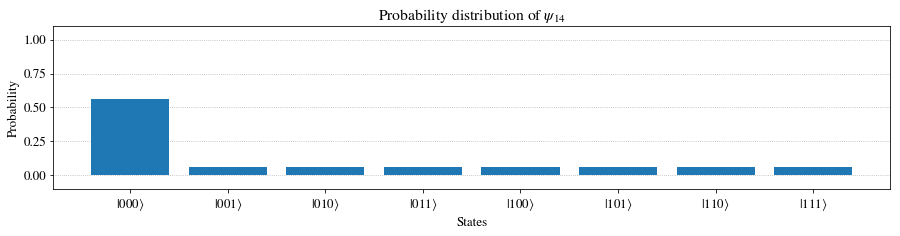

Since the state was observed the wave is now destroyed.


### The first min is 5

# Starting Iteration 0

## Filtering the dataset Elements

<IPython.core.display.Latex object>

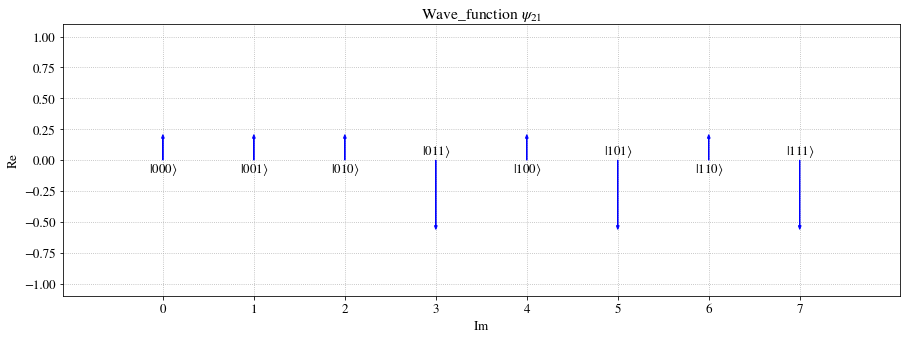

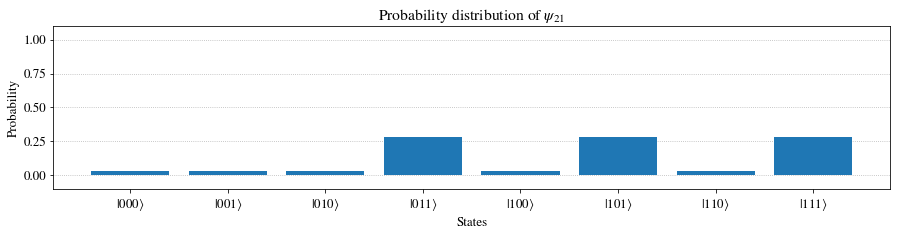

<IPython.core.display.Latex object>

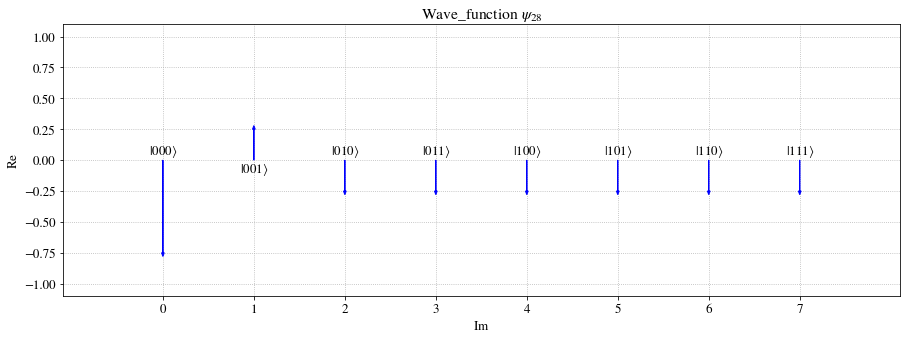

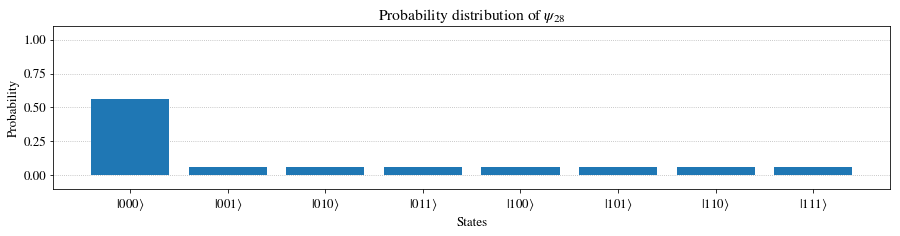

## Filtering the elements less equal than 5

<IPython.core.display.Latex object>

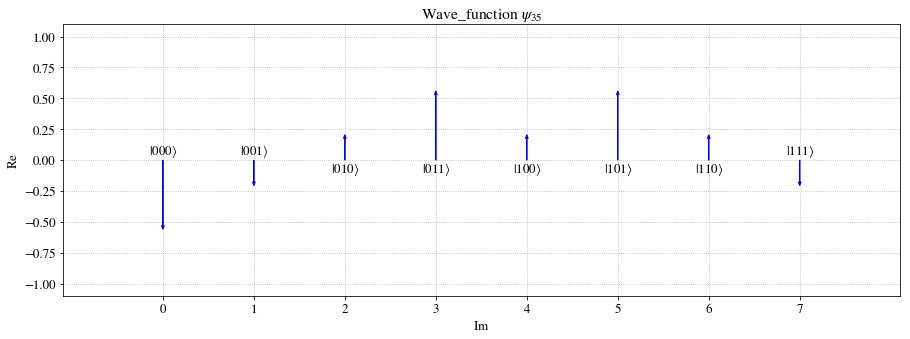

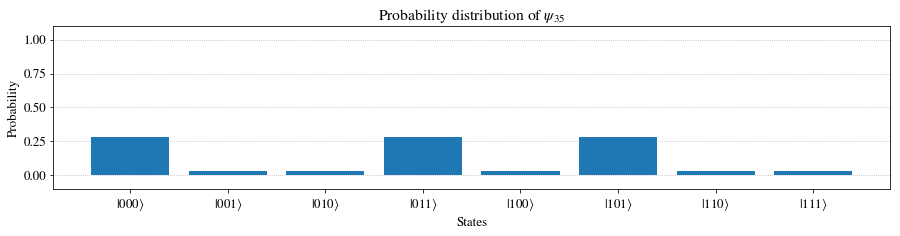

<IPython.core.display.Latex object>

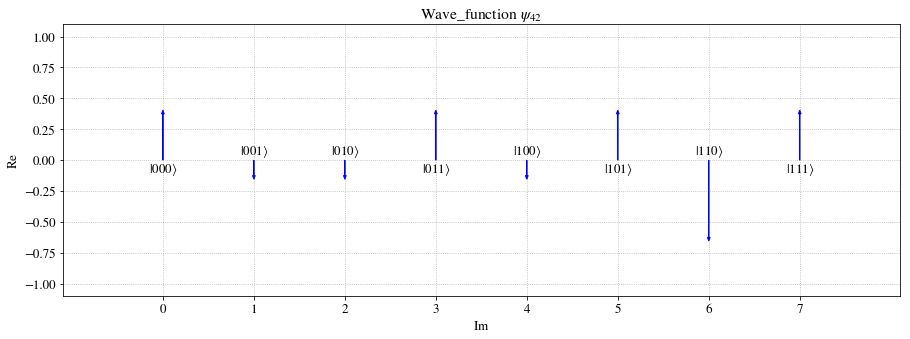

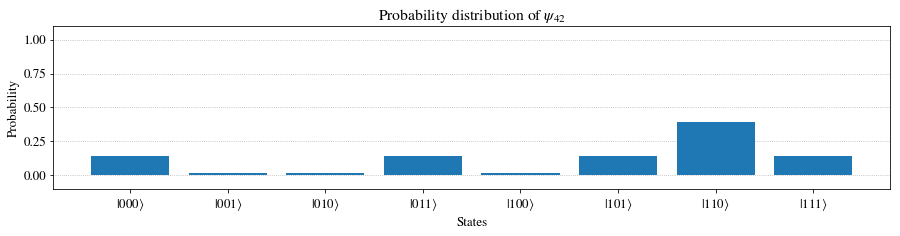

Since the state was observed the wave is now destroyed.


### The new min is 6

# Starting Iteration 1

## Filtering the dataset Elements

<IPython.core.display.Latex object>

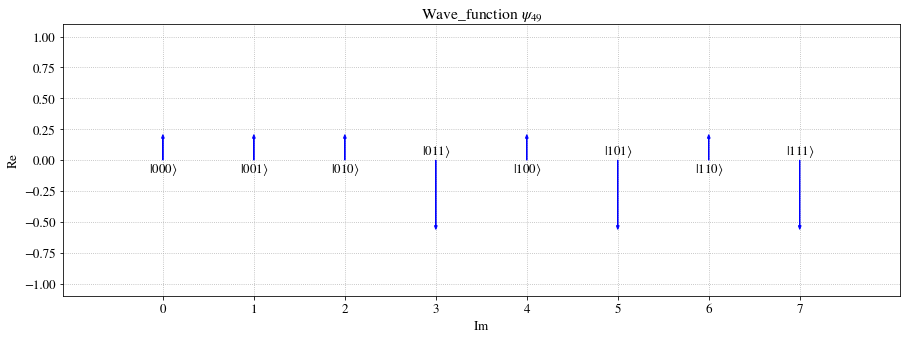

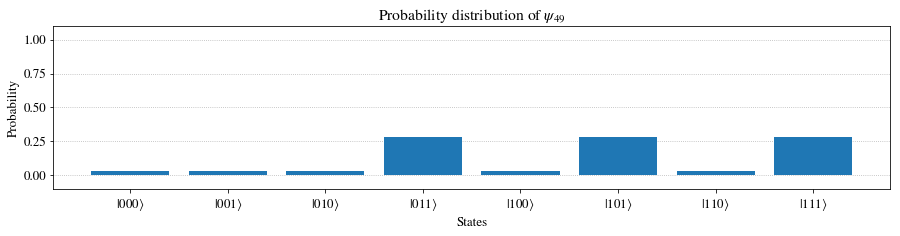

<IPython.core.display.Latex object>

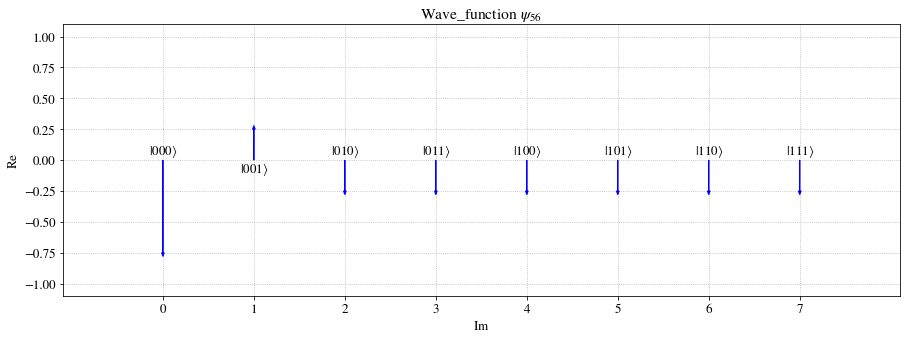

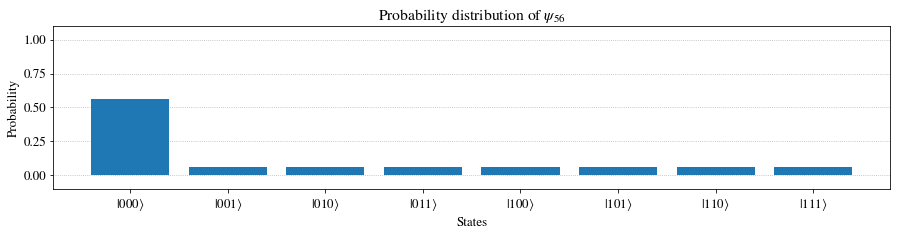

## Filtering the elements less equal than 6

<IPython.core.display.Latex object>

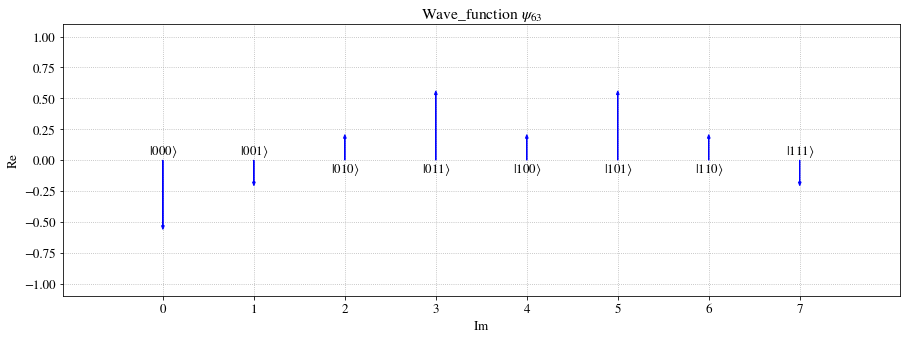

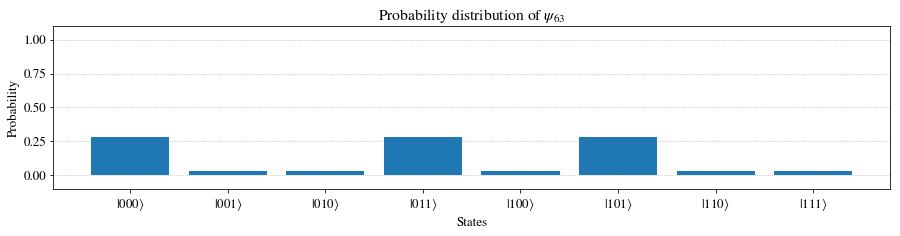

<IPython.core.display.Latex object>

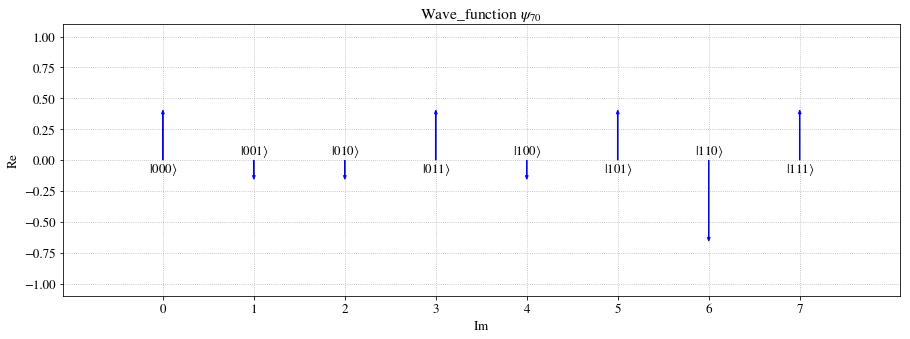

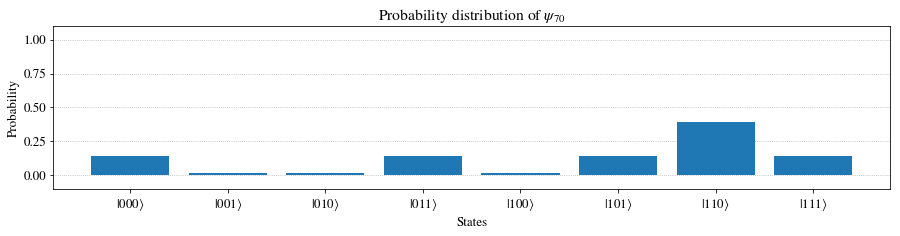

Since the state was observed the wave is now destroyed.


### The new min is 6

6

In [14]:
find_min(dataset)

In [15]:
q.print_history()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>